# Shrinkage(쉬링키지) 방법
  - OLS 해법은 관측치보다 변수가 많아지는 경우 신뢰성을 잃게 된다.<br> 
    즉, beta의 분산이 무한에 수렴하게 되는데 이 경우에 고안된 방법
    * OLS(최소자승법) : RSS(잔차제곱합)를 최소화하는 가중치 벡터를 구하는 방법<br><br> 
  - 계수추정치를 제한하여 계수 추정치가 0에 가까워 지게 하는 방법<br><br> 
  - 계수 추정치를 수축하는 것이 계수의 편차를 상당히 줄여줌<br><br> 
  - 회귀 계수를 수축하는 대표적인 방법 2가지 ridge, lasso

# 선형회귀 식 : $ Y_{i} = \alpha + \beta X_{i} + \epsilon_{i} $

# Ridge regressor(L2 규제)
  - 데이터에 잘 적합하여 RSS(잔차제곱합)를 작게 만드는 계수 추정치를 찾음.
    * 오차 : 모집단에서 (예측 - 실제값), 잔차 : 표본에서 (예측 - 실제값)<br><br> 
  - 규제항 : &nbsp;$ \alpha \sum_{j = 1}^{p}{\beta_{j}^{2}} $<br>
    즉, RSS + $ \alpha \sum_{j = 1}^{p}{\beta_{j}^{2}} $, &nbsp;$ \alpha $ : 조절모수<br><br> 
  - 미분이 가능해 gradient descent 최적화가 가능<br><br>
  - 사용코드<br>
    from sklearn.liner_model import Ridge<br>
    rd=Ridge(alpha=1, solver='cholesky')<br>  # alpha : 규제 정도, cholesky: 쇼레스키 분해 용법
    
    sgd=SGDRegressor(max_iter=5, penalty = 'l2')

# Lasso regressor(L1 규제)
  - ridge회귀와 비슷하나 패널티를 절댓값으로 줌<br>
  RSS + $ \alpha \sum_{j = 1}^{p}\vert {\beta_{j}\vert} $, &nbsp;$ \alpha $ : 조절모수<br><br>
  - 사용코드<br>
    from sklearn.liner_model import Lasso<br>
    rd=Lasso(alpha=1)<br>
    
    sgd=SGDRegressor(max_iter=5, penalty = 'l1')

# Elastic Net
  - 릿지와 라쏘의 절충 모델 RSS + $\lambda$($ \frac{1-\alpha}{2} \sum_{j = 1}^{p}{\beta_{j}^{2}} $ + $\alpha \sum_{j = 1}^{p}\vert {\beta_{j}\vert} $)<br><br>
  - $ \alpha $를 사용해 조절, $ \alpha $=0이면 릿지 $ \alpha $=1이면 라쏘<br><br>
  - 사용코드<br>
    from sklearn.linear_model import ElasticNet<br>
    elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Ridge vs Lasso
  - 라쏘가 최소값 근방에서 급속히 w=0 으로 향하게 된다.<br>
    즉, 릿지는 모든 w 값이 천천히 0으로 향하는 데 반해, 라쏘는 특정 w 값이 빨리 0으로 향하게 됨<br>
   
   - ridge(l2) : 가중치를 적당하게 살려줌<br>
     lasso(l1) : 가중치를 완전히 제거

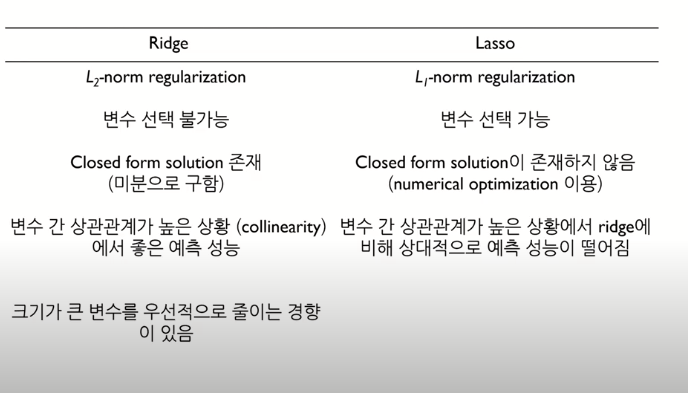

In [3]:
from PIL import Image
im = Image.open('ridge_lasso.png')
im

# normalization
  1. min-max
    - 0~1로 변환, 이상치에 민감
  2. z-score normalization
    - z = x - mean(x) / std(x)
    - 이상치 문제를 어느정도 해소, 정확히 동일한 척도로 정규화 되지 않음

# 베이즈 정리
- 두 확률 변수의 사전 확률과 사후 확률 사이의 관계를 나타내는 정리
- 추론 대상의 사전 확률과 추가적인 정보를 통해 해당 대상의 사후 확률을 추론하는 방법<br>
$ P(H|E)=\frac{p(E|H)p(H)}{p(E)} $, &nbsp;&nbsp;&nbsp;P(H|E) : 사후확률 &nbsp;/&nbsp; p(H) : 사전확률<br>
- 가령 동전의 앞면이 나올 확률이 50%라고 하면, 빈도주의자들은 100번 동전을 던졌을 때 50번은 앞면이 나온다고 해석하고, 베이지안 주의자들은 동전의 앞면이 나왔다는 주장의 신뢰도가 50%라고 보는 것.
- 조건부 확률을 반대로 뒤집은 상황
  * [e.g] 사건 F가 발생했을때 사건 E가 발생할 확률
    - 이때 주어진 값(확률)은 사건 E가 발생했을때 사건 F가 발생할 확률

# 나이브 베이즈
  - 사용코드<br>
  from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델<br>
  from sklearn.feature_extraction.text import CountVectorizer<br>
  from sklearn.feature_extraction.text import TfidTransformer # TF-IDF 가중치를 적용<br>
  
  cv = CountVectorizer()<br>
  x_train = cv.fit_transform(newsdata.data)<br>
  tfid=TfidTransformer()<br>
  tfid_train=tfid.fit_transform(x_train)<br>
  nb=MultinomialNB()<br>
  nb.fit(tfid_train,label)

# 차원축소 (Dimensionality Reduction)
: 차원의 수를 줄이는 것, 변수의 수를 줄이는 것
- 데이터를 줄이는 이유<br>
  1) 시간 복잡도와 공간 복잡도가 줄어듬<br>
  2) 과적합 방지<br>
  3) 모델의 결과를 이해하고 시각화하기 쉬움<br>
- 차원 = 변수의 수<br>
- 차원의 저주 : 변수의 수가 늘어나 차원이 커지면서 발생하는 문제<br>
  * 변수의 수가 많아지면 차원이 커지므로 분석을 위한 최소한의 필요 데이터 건수도 많아지는데 충분히 공간을 채울 데이터가 없을 때 발생하는 과적합
- 2가지 방법<br>
  1) Feature Selection : 중요한 변수만 몇 개 고르고 나머지는 버리는 방법
  * 상관계수가 높거나 VIF(분산팽창지수, Variance Inflation Factor)가 높은 중첩되는 변수들 중 하나만을 선택한다.
  * 종속변수에 영향을 크게 주는 중요한 변수는 랜덤포레스트(Random Forest) 또는 XGBoost 등을 이용해 Variable Importance를 찾아 몇 가지 변수만 선택한다.<br>

  2) Feature Extraction(주성분 분석, PCA) : 모든 변수를 조합하여 이 데이터를 잘 표현할 수 있는 중요 성분을 가진 새로운 변수를 추출

# 주성분 분석
- PCA전 스케일링 필요<br>
- 제 1 주성분(PC1) : 데이터를 가장 폭 넓게 설명할 수 있는 축<br>
- 제 2 주성분(PC2) : 제 1 주성분의 영향을 뺀 후, PC1을 찾을 때 처럼 그 다음으로 가장 주요한 성분을 찾는 것<br>
  * 제 1 주성분의 영향을 뺀 상태에서 가장 분산이 큰 축은 x축이 된 제 1 주성분과 직교하는 선(PC2)<br>
- scree plot을 통해(고유값, 고유벡터) 필요한 주성분의 갯수 설정<br>
- 사용코드<br>
  from sklearn.decomposition import PCA<br>
  pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정<br>
  printcipalComponents = pca.fit_transform(x)<br>
  principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2']) # 주성분으로 이루어진 데이터 프레임 구성<br>
  pca.explained_variance_ratio_ # 분산설명량